In [4]:
import xml.etree.ElementTree as ET
import os
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform, cosine, euclidean
import umap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# 0 - unpack zip files programmatically

In [12]:
import os, zipfile

dir_name = '../../../data'
dest_dir = os.path.join(dir_name, "zenodo_00_40")
extension = ".zip"

#os.chdir(dir_name) # change directory from working dir to dir with files

for item in os.listdir(dir_name): # loop through items in dir
    if item.endswith(extension): # check for ".zip" extension
        file_name = os.path.join(dir_name, item) # get full path of files
        print(file_name)
        zip_ref = zipfile.ZipFile(file_name) # create zipfile object
        for file in zip_ref.namelist():
            if file.endswith(".xml"):
                print(file.split("/")[1])
                new_file = file.split("/")[1]
                with open(os.path.join(dest_dir, new_file), 'wb') as f:
                        f.write(zip_ref.read(file))
        zip_ref.close() # close file

../../../data\BurnPatient0.00TBSAwoIntervention.zip
BurnPatient00@10hr.xml
BurnPatient00@11hr.xml
BurnPatient00@12hr.xml
BurnPatient00@13hr.xml
BurnPatient00@14hr.xml
BurnPatient00@15hr.xml
BurnPatient00@16hr.xml
BurnPatient00@17hr.xml
BurnPatient00@18hr.xml
BurnPatient00@19hr.xml
BurnPatient00@1hr.xml
BurnPatient00@20hr.xml
BurnPatient00@21hr.xml
BurnPatient00@22hr.xml
BurnPatient00@23hr.xml
BurnPatient00@24hr.xml
BurnPatient00@2hr.xml
BurnPatient00@3hr.xml
BurnPatient00@4hr.xml
BurnPatient00@5hr.xml
BurnPatient00@6hr.xml
BurnPatient00@7hr.xml
BurnPatient00@8hr.xml
BurnPatient00@9hr.xml
../../../data\BurnPatient0.01TBSAwoIntervention.zip
BurnPatient01@10hr.xml
BurnPatient01@11hr.xml
BurnPatient01@12hr.xml
BurnPatient01@13hr.xml
BurnPatient01@14hr.xml
BurnPatient01@15hr.xml
BurnPatient01@16hr.xml
BurnPatient01@17hr.xml
BurnPatient01@18hr.xml
BurnPatient01@19hr.xml
BurnPatient01@1hr.xml
BurnPatient01@20hr.xml
BurnPatient01@21hr.xml
BurnPatient01@22hr.xml
BurnPatient01@23hr.xml
BurnPatie

../../../data\BurnPatient0.14TBSAwoIntervention.zip
BurnPatient14@10hr.xml
BurnPatient14@11hr.xml
BurnPatient14@12hr.xml
BurnPatient14@13hr.xml
BurnPatient14@14hr.xml
BurnPatient14@15hr.xml
BurnPatient14@16hr.xml
BurnPatient14@17hr.xml
BurnPatient14@18hr.xml
BurnPatient14@19hr.xml
BurnPatient14@1hr.xml
BurnPatient14@20hr.xml
BurnPatient14@21hr.xml
BurnPatient14@22hr.xml
BurnPatient14@23hr.xml
BurnPatient14@24hr.xml
BurnPatient14@2hr.xml
BurnPatient14@3hr.xml
BurnPatient14@4hr.xml
BurnPatient14@5hr.xml
BurnPatient14@6hr.xml
BurnPatient14@7hr.xml
BurnPatient14@8hr.xml
BurnPatient14@9hr.xml
../../../data\BurnPatient0.15TBSAwoIntervention.zip
BurnPatient15@10hr.xml
BurnPatient15@11hr.xml
BurnPatient15@12hr.xml
BurnPatient15@13hr.xml
BurnPatient15@14hr.xml
BurnPatient15@15hr.xml
BurnPatient15@16hr.xml
BurnPatient15@17hr.xml
BurnPatient15@18hr.xml
BurnPatient15@19hr.xml
BurnPatient15@1hr.xml
BurnPatient15@20hr.xml
BurnPatient15@21hr.xml
BurnPatient15@22hr.xml
BurnPatient15@23hr.xml
BurnPatie

BurnPatient30@4hr.xml
BurnPatient30@5hr.xml
../../../data\BurnPatient0.31TBSAwoIntervention.zip
BurnPatient31@1hr.xml
BurnPatient31@2hr.xml
BurnPatient31@3hr.xml
BurnPatient31@4hr.xml
BurnPatient31@5hr.xml
../../../data\BurnPatient0.32TBSAwoIntervention.zip
BurnPatient32@1hr.xml
BurnPatient32@2hr.xml
BurnPatient32@3hr.xml
BurnPatient32@4hr.xml
../../../data\BurnPatient0.33TBSAwoIntervention.zip
BurnPatient33@1hr.xml
BurnPatient33@2hr.xml
BurnPatient33@3hr.xml
BurnPatient33@4hr.xml
../../../data\BurnPatient0.34TBSAwoIntervention.zip
BurnPatient34@1hr.xml
BurnPatient34@2hr.xml
BurnPatient34@3hr.xml
../../../data\BurnPatient0.35TBSAwoIntervention.zip
BurnPatient35@1hr.xml
BurnPatient35@2hr.xml
BurnPatient35@3hr.xml
../../../data\BurnPatient0.36TBSAwoIntervention.zip
BurnPatient36@1hr.xml
BurnPatient36@2hr.xml
BurnPatient36@3hr.xml
../../../data\BurnPatient0.37TBSAwoIntervention.zip
BurnPatient37@1hr.xml
BurnPatient37@2hr.xml
BurnPatient37@3hr.xml
../../../data\BurnPatient0.38TBSAwoInterve

IndexError: list index out of range

# 1 - functions to read XML for the whole state (~20k features) and just the error function 

In [97]:
#this function parses a BG xml state file for specific elements we want to include in an error function
def add_system_elements(root, sys_type, sys_elements, ns):
    col_vals = {}
    for system in root.findall(".//BG:System[@xsi:type='"+sys_type+"']", ns):
         for sub_elem in sys_elements: 
            col_val = system.find("BG:"+sub_elem, ns).attrib["value"]
            col_name = "_".join(["System", sys_type, sub_elem])
            col_vals[col_name] = col_val
            print(col_name, col_val)
    return col_vals

#UrineProductionRate_mL_Per_min xsi:type="BioGearsRenalSystemData", System
#UrineProductionRate xsi:type="BioGearsRenalSystemData", System
#SkinTemperature xsi:BioGearsEnergySystemData

# <System xsi:type="BioGearsCardiovascularSystemData">, <HeartRate readOnly="false" unit="1/min" value="72.2259599982094"/>
#   <System xsi:type="BioGearsCardiovascularSystemData">, <SystolicArterialPressure readOnly="false" unit="mmHg" value="114.330638012746"/>        
#   <System xsi:type="BioGearsCardiovascularSystemData">, <DiastolicArterialPressure readOnly="false" unit="mmHg" value="73.3082616148189"/>
#   <System xsi:type="BioGearsCardiovascularSystemData">, <CardiacOutput readOnly="false" unit="mL/min" value="5975.89457426133"/>
#   <System xsi:type="BioGearsCardiovascularSystemData">, <SystemicVascularResistance readOnly="false" unit="mmHg s/mL" value="0.912993395707968"/>
#   <System xsi:type="BioGearsCardiovascularSystemData">, <BloodVolume readOnly="false" unit="mL" value="5613.857708257"/>

#     <System xsi:type="BioGearsBloodChemistrySystemData">, <InflammatoryResponse>, <TissueIntegrity readOnly="false" value="0.727975915070117"/>
#   <System xsi:type="BioGearsBloodChemistrySystemData">, <ArterialBloodPH readOnly="false" value="7.45469889061384"/>    

#     <System xsi:type="BioGearsRespiratorySystemData">,    <RespirationRate readOnly="false" unit="1/min" value="24.5901639344262"/>
#   <System xsi:type="BioGearsRespiratorySystemData">,   <TidalVolume readOnly="false" unit="L" value="0.508949820975716"/>

#   <System xsi:type="BioGearsRenalSystemData">,    <MeanUrineOutput readOnly="false" unit="mL/day" value="1796.14878808744"/>

#     <DataRequest DecimalFormat="FixedMantissa" Name="HeartRate" Precision="6" Unit="1/min" xsi:type="PhysiologyDataRequestData"/>
#     <DataRequest DecimalFormat="FixedMantissa" Name="ArterialBloodPH" Precision="6" Unit="unitless" xsi:type="PhysiologyDataRequestData"/>
#     <DataRequest DecimalFormat="FixedMantissa" Name="CardiacOutput" Precision="6" Unit="mL/min" xsi:type="PhysiologyDataRequestData"/>
#     <DataRequest DecimalFormat="FixedMantissa" Name="InflammatoryResponse-TissueIntegrity" Precision="6" xsi:type="PhysiologyDataRequestData"/>
####     <DataRequest DecimalFormat="FixedMantissa" Name="MeanArterialPressure" Precision="6" Unit="mmHg" xsi:type="PhysiologyDataRequestData"/>
#     <DataRequest DecimalFormat="FixedMantissa" Name="SystolicArterialPressure" Precision="6" Unit="mmHg" xsi:type="PhysiologyDataRequestData"/>
#     <DataRequest DecimalFormat="FixedMantissa" Name="DiastolicArterialPressure" Precision="6" Unit="mmHg" xsi:type="PhysiologyDataRequestData"/>
#     <DataRequest DecimalFormat="FixedMantissa" Name="RespirationRate" Precision="6" Unit="1/min" xsi:type="PhysiologyDataRequestData"/>
#     <DataRequest DecimalFormat="FixedMantissa" Name="TidalVolume" Precision="6" Unit="mL" xsi:type="PhysiologyDataRequestData"/>
#     <DataRequest DecimalFormat="FixedMantissa" Name="SystemicVascularResistance" Precision="6" Unit="mmHg s/mL" xsi:type="PhysiologyDataRequestData"/>
#     <DataRequest DecimalFormat="FixedMantissa" Name="BloodVolume" Precision="6" Unit="mL" xsi:type="PhysiologyDataRequestData"/>
#     <DataRequest DecimalFormat="FixedMantissa" Name="MeanUrineOutput" Precision="6" Unit="mL/hr" xsi:type="PhysiologyDataRequestData"/>

In [93]:
#This function reads BioGears XML state files, extracts the relevant elements, and returns a dataframe

def get_patient_dataframes(data_path, diff=1):
    filename_delim = "@"
    patients_df  = pd.DataFrame()
    patients_err_df  = pd.DataFrame()
    ns = {"BG":"uri:/mil/tatrc/physiology/datamodel", "xsi":"http://www.w3.org/2001/XMLSchema-instance"}

    sys_error_map = {"BioGearsCardiovascularSystemData":["HeartRate", "SystolicArterialPressure", "DiastolicArterialPressure", "CardiacOutput", "SystemicVascularResistance", "BloodVolume"],
              "BioGearsBloodChemistrySystemData":["InflammatoryResponse/BG:TissueIntegrity", "ArterialBloodPH"],
              "BioGearsRespiratorySystemData":["RespirationRate", "TidalVolume"],
              "BioGearsRenalSystemData":["MeanUrineOutput", "UrineProductionRate"],
              "BioGearsEnergySystemData":["SkinTemperature"]}
    
    #loop through the files
    for file_name in os.listdir(data_path):
        if file_name.endswith("xml"):
            #setup some intial vars for each file
            col_vals = {}
            err_col_vals = {}
            hour_token = file_name.split(filename_delim)[1]
            hour = hour_token.split("h")[0]
            if len(hour) == 1:
                hour = "0" + hour
            tbsa_token = file_name.split(filename_delim)[0]
            tbsa = tbsa_token[-2:]
            file_path = os.path.join(data_path,file_name)

            #Now parse the file
            #TODO this really should be refactored into somehtign more generic
            print("Parsing: " + file_path)            
            tree = ET.parse(file_path)
            root = tree.getroot()

            #get system states
            prefix = "system"
            for tag in root.findall(".//BG:System/*", ns):
                if ( tag.text != None):
                    col_val = tag.text
                    col_name = "_".join([prefix, tag.tag.split("}")[-1]])
                    col_vals[col_name] = col_val
            for pat in root.findall(".//BG:System/*[@value]", ns):
                col_val = pat.attrib["value"]
                col_name = "_".join([prefix, pat.tag.split("}")[-1]])
                col_vals[col_name] = col_val
            
            #get active subtances
            prefix = "active_action"
            for sub in root.findall(".//BG:ActiveAction[@xsi:type='SubstanceCompoundInfusionData']", ns):
                name = sub.find("BG:SubstanceCompound",ns).text
                sub_elements = ["Rate", "BagVolume"]
                for sub_elem in sub_elements:                
                    col_val = sub.find("BG:"+sub_elem,ns).attrib["value"]
                    col_name = "_".join([prefix, name, sub_elem])
                    col_vals[col_name] = col_val
            
            #get active subtances
            prefix = "active_substance"
            for sub in root.findall(".//BG:ActiveSubstance", ns):
                name = sub.find("BG:Name",ns).text
                state = sub.find("BG:State",ns).text
                for tag in sub.findall(".//*[@value]", ns):
                    col_val = tag.attrib["value"]
                    col_name = "_".join([prefix, name, state,tag.tag.split("}")[-1]])
                    col_vals[col_name] = col_val

            #get circuit manager -TODO REFACTOR to loop
            prefix = "circuit_manager_fluid_node"
            for sub in root.findall(".//BG:CircuitManager/BG:FluidNode", ns):
                name = sub.find("BG:Name",ns).text
                for tag in sub.findall("./*[@value]", ns):
                    col_val = tag.attrib["value"]
                    col_name = "_".join([prefix, name, tag.tag.split("}")[-1]])
                    col_vals[col_name] = col_val

            prefix = "circuit_manager_fluid_path"
            for sub in root.findall(".//BG:CircuitManager/BG:FluidPath", ns):
                name = sub.find("BG:Name",ns).text
                for tag in sub.findall("./*[@value]", ns):
                    col_val = tag.attrib["value"]
                    col_name = "_".join([prefix, name, tag.tag.split("}")[-1]])
                    col_vals[col_name] = col_val

            prefix = "circuit_manager_thermal_node"
            for sub in root.findall(".//BG:CircuitManager/BG:ThermalNode", ns):
                name = sub.find("BG:Name",ns).text
                for tag in sub.findall("./*[@value]", ns):
                    col_val = tag.attrib["value"]
                    col_name = "_".join([prefix, name, tag.tag.split("}")[-1]])
                    col_vals[col_name] = col_val

            prefix = "circuit_manager_thermal_path"
            for sub in root.findall(".//BG:CircuitManager/BG:ThermalPath", ns):
                name = sub.find("BG:Name",ns).text
                for tag in sub.findall("./*[@value]", ns):
                    col_val = tag.attrib["value"]
                    col_name = "_".join([prefix, name, tag.tag.split("}")[-1]])
                    col_vals[col_name] = col_val

            #compartment manager TODO refactor into loop
            prefix = "compartment_manager_gas_compartment"
            for sub in root.findall(".//BG:CompartmentManager/BG:GasCompartment", ns):
                name = sub.find("BG:Name",ns).text
                for tag in sub.findall("./*[@value]", ns):
                    col_val = tag.attrib["value"]
                    col_name = "_".join([prefix, name, tag.tag.split("}")[-1]])
                    col_vals[col_name] = col_val

                for tag in sub.findall("./BG:SubstanceQuantity", ns):
                    name2 = tag.find("BG:Substance",ns).text
                    for tag2 in tag.findall("./*[@value]", ns):
                        col_val = tag2.attrib["value"]
                        col_name = "_".join([prefix, name, name2, tag2.tag.split("}")[-1]])
                        col_vals[col_name] = col_val

            prefix = "compartment_manager_liquid_compartment"
            for sub in root.findall(".//BG:CompartmentManager/BG:LiquidCompartment", ns):
                name = sub.find("BG:Name",ns).text

                for tag in sub.findall("./*[@value]", ns):
                    col_val = tag.attrib["value"]
                    col_name = "_".join([prefix, name, tag.tag.split("}")[-1]])
                    col_vals[col_name] = col_val

                for tag in sub.findall("./BG:SubstanceQuantity", ns):
                    name2 = tag.find("BG:Substance",ns).text
                    for tag2 in tag.findall("./*[@value]", ns):
                        col_val = tag2.attrib["value"]
                        col_name = "_".join([prefix, name, name2, tag2.tag.split("}")[-1]])
                        col_vals[col_name] = col_val

            prefix = "compartment_manager_thermal_compartment"
            for sub in root.findall(".//BG:CompartmentManager/BG:ThermalCompartment", ns):
                name = sub.find("BG:Name",ns).text
                for tag in sub.findall("./*[@value]", ns):
                    col_val = tag.attrib["value"]
                    col_name = "_".join([prefix, name, tag.tag.split("}")[-1]])
                    col_vals[col_name] = col_val

            prefix = "compartment_manager_tissue_compartment"
            for sub in root.findall(".//BG:CompartmentManager/BG:TissueCompartment", ns):
                name = sub.find("BG:Name",ns).text
                for tag in sub.findall("./*[@value]", ns):
                    col_val = tag.attrib["value"]
                    col_name = "_".join([prefix, name, tag.tag.split("}")[-1]])
                    col_vals[col_name] = col_val

            prefix = "compartment_manager_liquid_link"
            for sub in root.findall(".//BG:CompartmentManager/BG:LiquidLink", ns):
                name = sub.find("BG:Name",ns).text
                for tag in sub.findall("./*[@value]", ns):
                    col_val = tag.attrib["value"]
                    col_name = "_".join([prefix, name, tag.tag.split("}")[-1]])
                    col_vals[col_name] = col_val

            prefix = "compartment_manager_gas_link"
            for sub in root.findall(".//BG:CompartmentManager/BG:GasLink", ns):
                name = sub.find("BG:Name",ns).text
                for tag in sub.findall("./*[@value]", ns):
                    col_val = tag.attrib["value"]
                    col_name = "_".join([prefix, name, tag.tag.split("}")[-1]])
                    col_vals[col_name] = col_val

            prefix = "compartment_manager_thermal_link"
            for sub in root.findall(".//BG:CompartmentManager/BG:ThermalLink", ns):
                name = sub.find("BG:Name",ns).text
                for tag in sub.findall("./*[@value]", ns):
                    col_val = tag.attrib["value"]
                    col_name = "_".join([prefix, name, tag.tag.split("}")[-1]])
                    col_vals[col_name] = col_val

            print("Features extracted: " + str(len(col_vals)))
            patient_df = pd.DataFrame( data = [ list(col_vals.values())], columns = list(col_vals.keys()) )
            patient_df["hour"] = hour
            patient_df["tbsa"] = tbsa
            patient_df["tbsa_hour"] = "_".join([str(tbsa), str(hour)])
            patients_df = pd.concat([patients_df, patient_df])

            #get error function dataframes
            for sys_type, sys_elements in sys_error_map.items():
                new_cols = add_system_elements(root, sys_type, sys_elements, ns)
                err_col_vals = {**err_col_vals, **new_cols}
            print("Error Features extracted: " + str(len(err_col_vals)))
            patient_err_df = pd.DataFrame( data = [ list(err_col_vals.values())], columns = list(err_col_vals.keys()) )
            patient_err_df["hour"] = hour
            patient_err_df["tbsa"] = tbsa
            patient_err_df["tbsa_hour"] = "_".join([str(tbsa), str(hour)])
            patients_err_df = pd.concat([patients_err_df, patient_err_df])
                
    print("Cleaning up...")
    
    #Drop text composite elements we picked up by accident
    patients_clean = patients_df.replace("\n      ", np.nan).dropna(axis=1)

    #Cast datatypes from object/srting to floats
    for col in patients_clean.columns[:-3]:
        try:
            patients_clean[col] = patients_clean[col].astype(float)
        except ValueError:
            #patients_clean[col] = patients_clean[col].astype("category")#.cat.categories
            patients_clean[col] = pd.Categorical(patients_clean[col]).codes.astype(float)
            pass

    return patients_clean, patients_err_df

# 2 - get distance matrix

In [344]:
#this function scales patient states then computes the distance matrix usign euclidean distance 
def get_distance_matrix(patients_df):
    #scale patient values
    scaler = StandardScaler()
    patients_df = patients_df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

    #don't include hour, tbsa, or tbsa_hour columns
    scaler.fit(patients_df.iloc[:,0:-3])
    patients_scaled = scaler.transform(patients_df.iloc[:,0:-3])
    
    #you can easily swap distanc efunctions for commenting/uncommmenting here
    #TODO parameterize this
    #dists = pdist(patients_scaled, cosine)
    dists = pdist(patients_scaled, euclidean)
    
    patient_dists = pd.DataFrame(squareform(dists), columns=patients_df["tbsa_hour"].values, index=patients_df["tbsa_hour"].values)
    patient_dists = patient_dists[sorted(patient_dists.columns)]
    patient_dists = patient_dists.sort_index()

    fig, ax = plt.subplots(figsize=(11, 9))
    mask = np.triu(np.ones_like(patient_dists, dtype=bool))
    cmap = sns.diverging_palette(20, 230, as_cmap=True)
    sns.set(style='white', font_scale = 1.0)
    sns_ax = sns.heatmap(patient_dists, mask=mask, cmap=cmap)#, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
    sns_ax.set_xlabel('Hourly Patient States (TBSA_hour)',fontsize=15)
    sns_ax.set_ylabel('Hourly Patient States (TBSA_hour)',fontsize=15)
    #sns_ax.set_title("Cosine Distance Between Hourly Patient States",fontsize=20)
    fig.savefig("tbsa_embedding_hourly_euclidean_distance_lower_tri", dpi=400)
    
    return patients_scaled, patient_dists

# 3 - assign labels

In [3]:
#helper function to get label susing DBscan....not that useful in hindsight
def get_cluster_labels(patients_dm):
    labels = DBSCAN(eps=0.45, min_samples=4, metric='precomputed').fit_predict(patients_dm)
    #np.unique(labels, return_counts=True)
    return labels

# 4 - learn embedding

In [4]:
#helper function to train a patient embedding
def get_trained_metric(X_train, y_train):
    reducer = umap.UMAP(n_neighbors=10)
    mapper = reducer.fit(X_train, y_train)
    
    return mapper

In [340]:
#this function generates a 3D plot, it is pretty hacky to get things setup correctly
def get_embedding_plot(patients_df, patients_scaled, labels):

    reducer = umap.UMAP(n_neighbors=10)
    mapper = reducer.fit(patients_scaled, labels)
    cluster_names = {1:"Mild", 0:"Moderate", 2:"Severe"}
    patient_embed_df = pd.DataFrame(mapper.embedding_, columns=('x', 'y'))
    patient_embed_df['cluster_id'] = labels
    patient_embed_df['cluster'] = [cluster_names[x] for x in labels]
    patient_embed_df['TBSA'] = patients_df["tbsa"].to_list()
    patient_embed_df['hour'] = patients_df["hour"].astype(int).to_list()
#    patient_embed_df['cluster_color'] = [cluster_color[x] for x in labels]
#    patient_embed_df['tbsa_color'] = [tbsa_color[x] for x in patients_df["tbsa"].to_list()]
    #sns.set(style='white', context='poster')

    #fig, ax = plt.subplots(1, figsize=(14, 10))
    fig = plt.figure(figsize=(11, 9))
    ax_3d = fig.gca(projection='3d')

    ax_3d.set_prop_cycle('color',plt.cm.Accent(np.linspace(0,1,5)))

    patient_embed_df_0 = patient_embed_df[patient_embed_df["cluster_id"] == 1]
    patient_embed_df_1 = patient_embed_df[patient_embed_df["cluster_id"] == 0]
    patient_embed_df_2 = patient_embed_df[patient_embed_df["cluster_id"] == 2]

    line_array = []
    for tbsa_int in [10,15,20,30,40]:
        patient_embed_df_tbsa = patient_embed_df_1[patient_embed_df_1["TBSA"] == tbsa_int]
        if (len(patient_embed_df_tbsa) > 0):
            line = ax_3d.scatter(xs = patient_embed_df_tbsa['x'], zs= patient_embed_df_tbsa['y'], ys= patient_embed_df_tbsa['hour'], marker='o', s=50, label=str(tbsa_int) + " - Mild")
            line_array.append(line)
        patient_embed_df_tbsa = patient_embed_df_0[patient_embed_df_0["TBSA"] == tbsa_int]
        if (len(patient_embed_df_tbsa) > 0):
            line = ax_3d.scatter(xs = patient_embed_df_tbsa['x'], zs= patient_embed_df_tbsa['y'], ys= patient_embed_df_tbsa['hour'], c=line_array[-1].get_facecolor(), marker='^', s=50, label=str(tbsa_int) + " - Moderate")
            line_array.append(line)
        patient_embed_df_tbsa = patient_embed_df_2[patient_embed_df_2["TBSA"] == tbsa_int]
        if (len(patient_embed_df_tbsa) > 0):
            line = ax_3d.scatter(xs = patient_embed_df_tbsa['x'], zs= patient_embed_df_tbsa['y'], ys= patient_embed_df_tbsa['hour'], c=line_array[-1].get_facecolor(), marker='x', s=50, label=str(tbsa_int) + " - Sever")
            line_array.append(line)
            
    #ax_3d.plot(patient_embed_df['x'], patient_embed_df['y'], 'ko', zdir='z', zs=0)
#     patient_embed_df_1_20 = patient_embed_df_1[patient_embed_df_1["TBSA"] == 20]
#     tbsa_20_1 = ax_3d.scatter(xs = patient_embed_df_1_20['x'], zs= patient_embed_df_1_20['y'], ys= patient_embed_df_1_20['hour'],c=line_array[-3].get_facecolor(), marker='^', s=50, label="20 - Moderate")
#     line_array.append(tbsa_20_1)
    
#     patient_embed_df_2_30 = patient_embed_df_2[patient_embed_df_2["TBSA"] == 30]
#     patient_embed_df_2_40 = patient_embed_df_2[patient_embed_df_2["TBSA"] == 40]
#     tbsa_30_2 = ax_3d.scatter(xs = patient_embed_df_2_30['x'], zs= patient_embed_df_2_30['y'], ys= patient_embed_df_2_30['hour'],c=line_array[-3].get_facecolor(), marker='x', s=50, label="30 - Severe")
#     tbsa_40_2 = ax_3d.scatter(xs = patient_embed_df_2_40['x'], zs= patient_embed_df_2_40['y'], ys= patient_embed_df_2_40['hour'],c=line_array[-2].get_facecolor(), marker='x', s=50, label="40 - Severe")
#     line_array.append(tbsa_30_2)
#     line_array.append(tbsa_40_2)

    ax_3d.set_xticklabels([])
    ax_3d.set_zticklabels([])
    ax_3d.tick_params(axis='y', which='major', labelsize=15)
    #ax_3d.set_zticks()
    ax_3d.set_xlabel('Embedded Dimension', fontsize=15)
    ax_3d.set_zlabel('Embedded Dimension', fontsize=15)
    ax_3d.set_ylabel('Hourly Patient State', fontsize=15)

    ax_3d.autoscale(tight=True)
    
    plt.legend(handles=line_array, fontsize=15, title="TBSA", loc=1)

    ax_3d.view_init(elev=15., azim=-15)
    
    
    #plt.title('BioGears TBSA Hourly States clustered with DBSCAN, Embedded via UMAP');
    #plt.legend(fontsize=15, loc=1)
    #plt.savefig("patient_embedding_umap_2d_dbscan_clustering2.png", dpi=400)
    
    return patient_embed_df, plt

# 5 - classification model

In [5]:
#helper fucntion to get soem basic predictions
#useful if we assume the labels are ground truth and not solely from unsupervised learning
def get_predictions(mapper, y_train, X_test, y_test):
    neigh = KNeighborsClassifier(n_neighbors=3)

    #use embedded transform of X_train
    neigh.fit(mapper.embedding_, y_train)

    #embed test data then predict it
    y_hat = neigh.predict(mapper.transform(X_test))
    
    return neigh, y_hat

# 6 - Evaluation

In [9]:
#helper function to plot the confusion matrix
def get_confusion_matrix(clf, mapper, X_test, y_test, display_labels):
    sns.set(style='white', context='poster')
    fig, ax = plt.subplots(1, figsize=(11, 9))
    disp = plot_confusion_matrix(clf, mapper.transform(X_test), y_test, display_labels=["Stable", "Unstable"], ax=ax)
    ax.set_title("K-NearestNeighbor Predictions (K=3)")
    fig.savefig("tbsa_embedding_knn_3_confusion_matrix", dpi=400)
    return fig

# Main function

In [10]:
#patients_df = get_patient_dataframes("../../../data/zenodo")
#patients_df.to_csv("../../../data/patients_TBSA_10_40.csv")

In [1]:
if __name__ == "__main__":
    main()
    
def main():
    #path to xml files
    display_labels=["Stable", "Unstable"]

    patients_df = pd.read_csv("../../../data/patients_TBSA_10_40.csv")

    patients_scaled, patients_dm = get_distance_matrix(patients_df)

    patients_labels = get_cluster_labels(patients_dm)

    X_train, X_test, y_train, y_test = train_test_split(patients_scaled, patients_labels, stratify=patients_labels)

    mapper = get_trained_metric(X_train, y_train)

    get_embedding_plot(patients_df, patients_scaled, patients_labels)

    clf, y_hat = get_predictions(mapper, y_train, X_test, y_test)

    cm = get_confusion_matrix(clf, mapper, X_test, y_test, display_labels)

NameError: name 'main' is not defined

# CLI

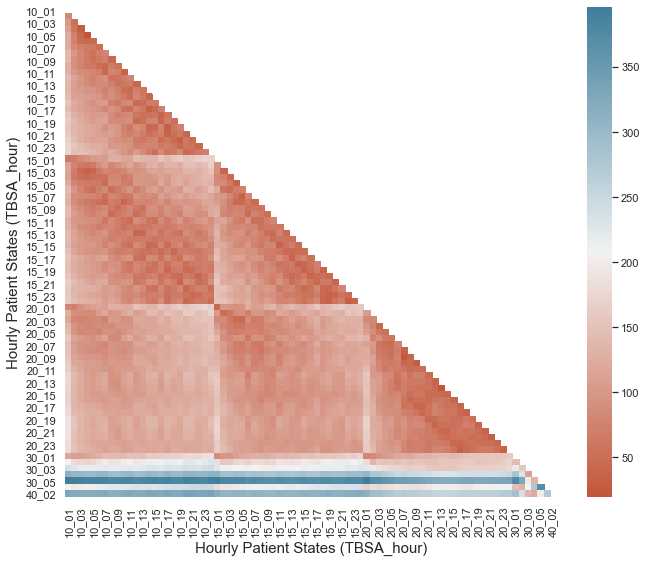

In [345]:
patients_df = pd.read_csv("../../../data/patients_TBSA_10_40.csv")

patients_scaled, patients_dm = get_distance_matrix(patients_df)

patients_labels = get_cluster_labels(patients_dm)
mapper = get_trained_metric(patients_scaled, patients_labels)

In [148]:
umap_df = pd.DataFrame(mapper.embedding_, columns=["umap_0", "umap_1"])#, patients_labels.tolist()])
#umap_df['umap'] = mapper.embedding_.tolist()
# umap_df['hour'] = patients_df["hour"].astype(int).to_list()
# umap_df['tbsa'] = patients_df["tbsa"].to_list()
# umap_df['tbsa_hour'] = umap_df['tbsa'].astype(str) + "_" + umap_df['hour'].astype(str)
# umap_df["target"] = patients_labels.tolist()
# umap_df.to_csv("../../../data/patients_TBSA_10_40_umap.csv", index=False)

In [149]:
umap_df = pd.concat([umap_df, patients_df.iloc[:,-3:]], axis=1)

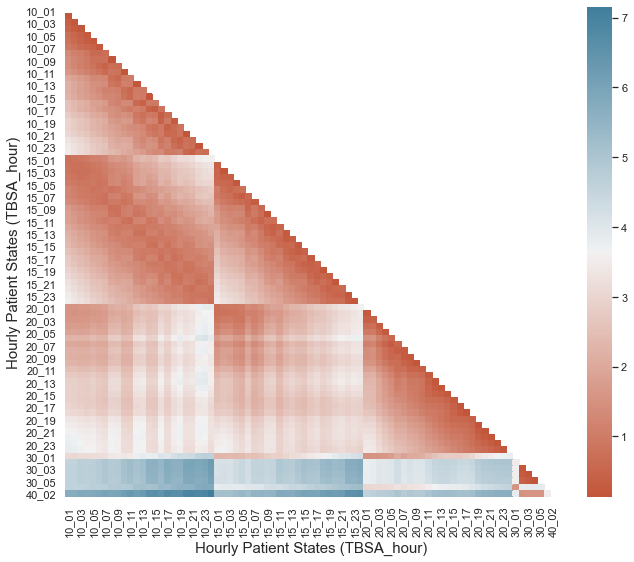

In [346]:
umap_scaled, umap_dm = get_distance_matrix(umap_df)

In [272]:
umap_labels = DBSCAN(eps=0.20, min_samples=3, metric='precomputed').fit_predict(umap_dm)
np.unique(umap_labels, return_counts=True)

(array([-1,  0,  1,  2,  3], dtype=int64),
 array([63,  3,  3,  6,  4], dtype=int64))

In [347]:
from sklearn.cluster import KMeans
umap_labels = KMeans(n_clusters=3, random_state=0).fit_predict(umap_df[["umap_0", "umap_1"]])
np.unique(umap_labels, return_counts=True)

(array([0, 1, 2]), array([27, 47,  5], dtype=int64))

<ipython-input-251-2264efcced50>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
<ipython-input-251-2264efcced50>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)


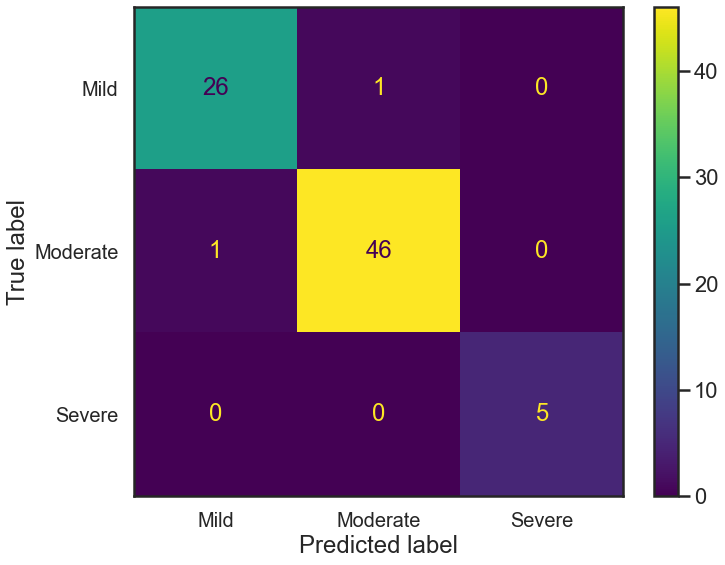

In [251]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
skf = StratifiedKFold(n_splits=4)
X = umap_df[["umap_0", "umap_1"]]
y = umap_labels
skf.get_n_splits(X, y)
cm = np.zeros((3,3))
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    neigh.fit(X_train, y_train)

    #embed test data then predict it
    y_hat = neigh.predict(X_test)
    cm += confusion_matrix(y_test, y_hat)

fig, ax = plt.subplots(1, figsize=(11, 9))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)
disp.plot(ax=ax)

,x,y,cluster_id,cluster,TBSA,hour
0,14.446914,5.403872,1,Moderate,10,10
1,14.655412,5.169044,1,Moderate,10,11
2,12.295184,3.541232,1,Moderate,10,12
3,12.294165,3.104508,1,Moderate,10,13
4,15.931540,4.389711,1,Moderate,10,14
...,...,...,...,...,...,...
74,-19.027805,4.269076,2,Severe,30,3
75,-18.981602,4.315264,2,Severe,30,4
76,-18.883364,4.413514,2,Severe,30,5
77,10.401666,-7.169497,0,Mild,40,1


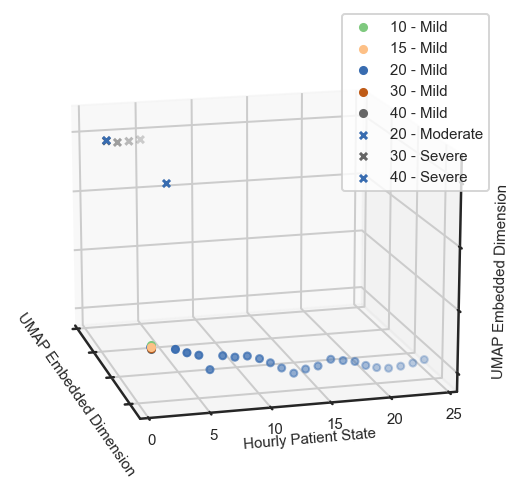

In [254]:
get_embedding_plot(patients_df, umap_df[["umap_0", "umap_1"]], umap_labels)

In [227]:
from sklearn.cluster import KMeans
labels = KMeans(n_clusters=3, random_state=0).fit_predict(patients_scaled)
np.unique(labels, return_counts=True)

(array([0, 1, 2]), array([30,  4, 45], dtype=int64))

In [64]:
umap_df["test_labels"] = labels#.to_list()

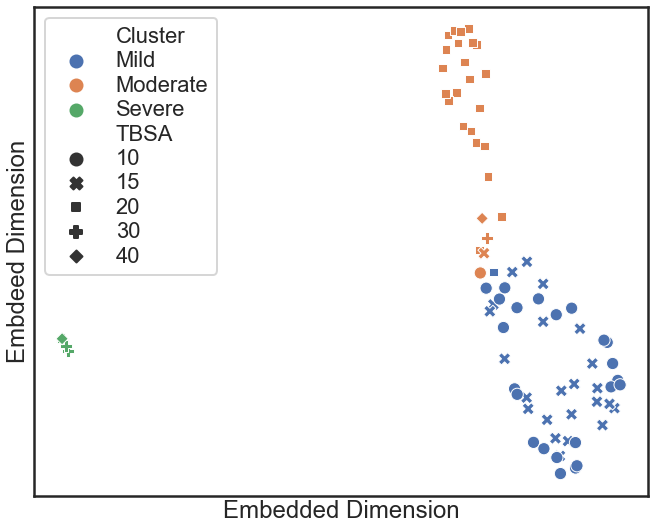

In [327]:
fig, ax = plt.subplots(1, figsize=(11, 9))
cluster_names = {-1:"noise", 0:"Moderate", 1:"Mild", 2:"Severe", 3:"D", 4:"E", 5:"F"}
patient_embed_df = umap_df#pd.DataFrame(embedding, columns=('x', 'y'))
patient_embed_df['Cluster'] = [cluster_names[x] for x in umap_labels]
patient_embed_df['TBSA'] = patients_df["tbsa"].to_list()
patient_embed_df['hour'] = patients_df["hour"].to_list()
sns.set(style='white', context='poster')
sns_ax = sns.scatterplot(data=patient_embed_df.sort_values("Cluster"), x="umap_0", y="umap_1", hue="Cluster", style="TBSA", s=150)
sns_ax.legend(loc=2, labelspacing=0.2)
#plt.setp(sns_ax.get_legend().get_texts(), fontsize='12') # for legend text
#plt.setp(sns_ax.get_legend().get_title(), fontsize='22') # for legend title
sns_ax.set_xticks([])
sns_ax.set_yticks([])
sns_ax.set_ylabel("Embedded Dimension")
sns_ax.set_xlabel("Embedded Dimension")
#sns_ax.set_title("UMAP Embedding of Hourly Patient States")
#fig.savefig("tbsa_cluster_umap_kmeans", dpi=400)

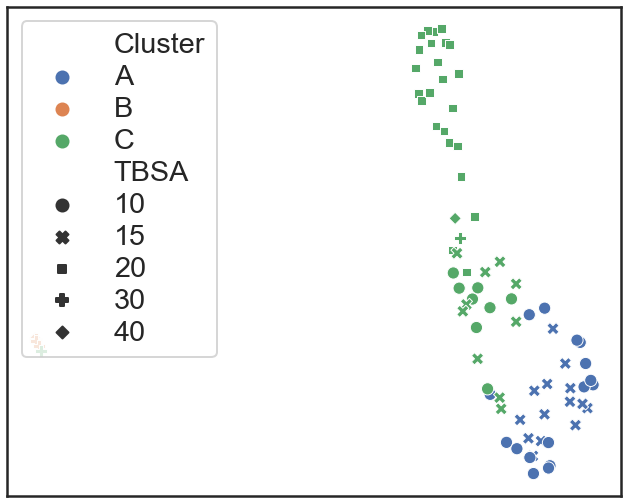

In [325]:
fig, ax = plt.subplots(1, figsize=(11, 9))
cluster_names = {-1:"noise", 0:"A", 1:"B", 2:"C", 3:"D", 4:"E", 5:"F"}
patient_embed_df = umap_df#pd.DataFrame(embedding, columns=('x', 'y'))
patient_embed_df['Cluster'] = [cluster_names[x] for x in labels]
patient_embed_df['TBSA'] = patients_df["tbsa"].to_list()
patient_embed_df['hour'] = patients_df["hour"].to_list()

sns_ax = sns.scatterplot(data=patient_embed_df.sort_values("Cluster"), x="umap_0", y="umap_1", hue="Cluster", style="TBSA", s=150)
sns_ax.legend(loc=2, fontsize = 'large', labelspacing=0.2)
#plt.setp(sns_ax.get_legend().get_texts(), fontsize='12') # for legend text
#plt.setp(sns_ax.get_legend().get_title(), fontsize='22') # for legend title
sns_ax.set_xticks([])
sns_ax.set_yticks([])
sns_ax.set_ylabel("")
sns_ax.set_xlabel("")
#sns_ax.set_title("UMAP Embedding of Hourly Patient States")
fig.savefig("tbsa_cluster_cosine_dbscan", dpi=400)